#### Customer Churn Prediction 2020
#### 

In [70]:

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import pandas as pd


In [71]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

profile = ProfileReport(df_train)
profile

In [72]:
df_train.head()
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3


In [73]:
df_train.isnull().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

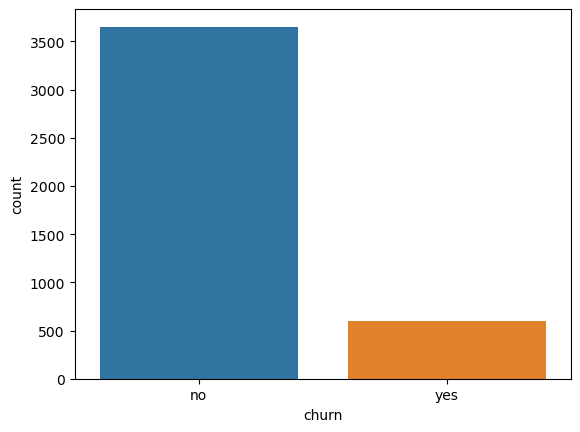

In [74]:
sns.countplot (x='churn',data=df_train)
plt.show

In [75]:
# preprocessing
df_train['area_code2']=df_train['area_code'].str.split('_').str[-1]


In [76]:
df_test['area_code2']=df_test['area_code'].str.split('_').str[-1]

In [77]:
df_train.head()

,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,...,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code2
0,OH,107,area_code_415,no,yes,26,161.6,123,27.47,195.5,...,16.62,254.4,103,11.45,13.7,3,3.70,1,no,415
1,NJ,137,area_code_415,no,no,0,243.4,114,41.38,121.2,...,10.30,162.6,104,7.32,12.2,5,3.29,0,no,415
2,OH,84,area_code_408,yes,no,0,299.4,71,50.90,61.9,...,5.26,196.9,89,8.86,6.6,7,1.78,2,no,408
3,OK,75,area_code_415,yes,no,0,166.7,113,28.34,148.3,...,12.61,186.9,121,8.41,10.1,3,2.73,3,no,415
4,MA,121,area_code_510,no,yes,24,218.2,88,37.09,348.5,...,29.62,212.6,118,9.57,7.5,7,2.03,3,no,510


In [78]:
df_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,...,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code2
0,1,KS,128,area_code_415,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,415
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,...,101,18.75,203.9,118,9.18,6.3,6,1.70,0,510
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,...,76,26.11,203.0,99,9.14,13.1,6,3.54,4,415
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,...,111,18.55,129.6,121,5.83,8.1,3,2.19,3,510
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,...,112,23.55,250.7,115,11.28,15.5,5,4.19,3,415


In [79]:
df_train=df_train.drop('area_code',axis=1)
df_test=df_test.drop('area_code',axis=1)

In [80]:
df_train.head()

,state,account_length,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code2
0,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no,415
1,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no,415
2,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no,408
3,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no,415
4,MA,121,no,yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,no,510


In [81]:
df_train['state'].unique()

array(['OH', 'NJ', 'OK', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI', 'IA', 'MT',
       'NY', 'ID', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC', 'WY', 'HI', 'NH',
       'AK', 'GA', 'MD', 'AR', 'WI', 'OR', 'MI', 'DE', 'UT', 'CA', 'SD',
       'NC', 'WA', 'MN', 'NM', 'NV', 'DC', 'VT', 'KY', 'ME', 'MS', 'AL',
       'NE', 'KS', 'TN', 'IL', 'PA', 'CT', 'ND'], dtype=object)

In [82]:
categorical_data=['international_plan','voice_mail_plan']

In [83]:
data_frame_encoded = pd.get_dummies(df_train, columns=categorical_data)


In [84]:
data_frame_encoded_test = pd.get_dummies(df_test, columns=categorical_data)

In [85]:
data_frame_encoded.head()

,state,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn,area_code2,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,OH,107,26,161.6,123,27.47,195.5,103,16.62,254.4,...,13.7,3,3.70,1,no,415,1,0,0,1
1,NJ,137,0,243.4,114,41.38,121.2,110,10.30,162.6,...,12.2,5,3.29,0,no,415,1,0,1,0
2,OH,84,0,299.4,71,50.90,61.9,88,5.26,196.9,...,6.6,7,1.78,2,no,408,0,1,1,0
3,OK,75,0,166.7,113,28.34,148.3,122,12.61,186.9,...,10.1,3,2.73,3,no,415,0,1,1,0
4,MA,121,24,218.2,88,37.09,348.5,108,29.62,212.6,...,7.5,7,2.03,3,no,510,1,0,0,1


In [86]:
y_train=data_frame_encoded['churn']
y_train.head()

0    no
1    no
2    no
3    no
4    no
Name: churn, dtype: object

In [87]:
x_train=data_frame_encoded.copy()
x_train=x_train.drop('churn',axis=1)
x_train=x_train.drop('state',axis=1)

In [88]:
x_test=data_frame_encoded_test.copy()
X_test=x_test.drop('state',axis=1)
idx=X_test['id']
X_test=X_test.drop('id',axis=1)

In [89]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 750 non-null    int64  
 1   number_vmail_messages          750 non-null    int64  
 2   total_day_minutes              750 non-null    float64
 3   total_day_calls                750 non-null    int64  
 4   total_day_charge               750 non-null    float64
 5   total_eve_minutes              750 non-null    float64
 6   total_eve_calls                750 non-null    int64  
 7   total_eve_charge               750 non-null    float64
 8   total_night_minutes            750 non-null    float64
 9   total_night_calls              750 non-null    int64  
 10  total_night_charge             750 non-null    float64
 11  total_intl_minutes             750 non-null    float64
 12  total_intl_calls               750 non-null    int

In [90]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   account_length                 4250 non-null   int64  
 1   number_vmail_messages          4250 non-null   int64  
 2   total_day_minutes              4250 non-null   float64
 3   total_day_calls                4250 non-null   int64  
 4   total_day_charge               4250 non-null   float64
 5   total_eve_minutes              4250 non-null   float64
 6   total_eve_calls                4250 non-null   int64  
 7   total_eve_charge               4250 non-null   float64
 8   total_night_minutes            4250 non-null   float64
 9   total_night_calls              4250 non-null   int64  
 10  total_night_charge             4250 non-null   float64
 11  total_intl_minutes             4250 non-null   float64
 12  total_intl_calls               4250 non-null   i

In [91]:
X_test.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code2,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,128,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,415,1,0,0,1
1,118,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,510,0,1,1,0
2,62,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,4,415,1,0,1,0
3,93,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,3,510,1,0,1,0
4,174,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,3,415,1,0,1,0


In [92]:
x_train.head()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,area_code2,international_plan_no,international_plan_yes,voice_mail_plan_no,voice_mail_plan_yes
0,107,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,415,1,0,0,1
1,137,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,415,1,0,1,0
2,84,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,408,0,1,1,0
3,75,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,415,0,1,1,0
4,121,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,510,1,0,0,1


In [93]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(x_train)
x_test=scaler.fit_transform(X_test)

In [94]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

model=RandomForestClassifier(n_estimators=100)

model.fit(X_train,y_train)

RandomForestClassifier()

In [95]:
y_pred=model.predict(x_test)

In [96]:
submissionRF=pd.DataFrame({
    'id':idx,
    'churn':y_pred
})

In [97]:
submissionRF.to_csv('submissionRF.csv',index=False)

In [98]:
from sklearn.linear_model import LogisticRegression

In [99]:
modelR=LogisticRegression()
modelR.fit(X_train,y_train)

LogisticRegression()

In [100]:
y_predictR=modelR.predict(x_test)

In [101]:
submissionLR=pd.DataFrame({
    'id':idx,
    'churn':y_predictR
})

In [102]:
submissionLR.to_csv('submissionLR.csv',index=False)